In [1]:
#######################################################################################
#Código colaborativo de Diana Avendaño, Miguel Sánches, Flor Lozano y Salvador 
#Equipo 3, Laboratorio de análisis de datos. 
######################################################################################
#%reset
#--------------------------------------------------------------------
#Librerias
#--------------------------------------------------------------------
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#---------------------------------------------------------------------
#Función que descarga tablas de páginas web
#---------------------------------------------------------------------
#descarga las tablas y las almacena en la variable cat
def dow(url,cat):
    
    for i in range(len(url)):
        html = requests.get(url[i]).content
        x_list = pd.read_html(html,header=0)
        x = x_list[0]
        cat.append(x[4:]) #El cuatro indica que sólo queremos daos a aprtir del 
        #rengón 4 de nuestra tabla. Esto por conveniencia a nuestros datos.

In [3]:
#----------------------------------------------------------------------
#Gráficos
#-------------------------------------------------------------------

#hace una grafica de barras comparandolas por años
#what son las entradas de la tabla, name es el "label" de cada columna de nuestra tabla.
def barritas(what,name):
    
    width=0.8/len(what)
    fig, ax = plt.subplots()
#     plt.figure(figsize=(15,8))
    for i in range(len(what)):
        ax.bar(cat[0]['year'] - width/2 + width*i, 100*what[i], width ,label=name[i])
        
#    plt.title(title)
    plt.grid()
    plt.legend()
    plt.xlabel('Año')
    plt.ylabel('% de la población')
    plt.show()

In [4]:
#---------------------------------------------------------------------------
#////////////////////////READ ME////////////////////////
#---------------------------------------------------------------------------


html = requests.get('https://github.com/resbaz/data/blob/master/marriage/README.md').content
x_list = pd.read_html(html,header=0)
x = x_list[0]
x

,Header,Description
0,all,Total (or all men/women in sex-specific files)
1,HS,High school graduate or less (EDUCD < 65)
2,SC,Some college (EDUCD >= 65 & <= 100)
3,BAp,Bachelor's degree or more (EDUCD > 100)
4,BAo,"Bachelor's degree, no graduate degre (EDUCD > ..."
5,GD,Graduate degree (EDUCD > 113)
6,White,Non-Hispanic white
7,Black,Black or African-American
8,Hisp,Hispanic of any race
9,NE,New England (REGION == 11)


In [5]:
#---------------------------------------------------------------------------------------
#Función que determina la mediana de una distribución de datos.
#---------------------------------------------------------------------------------------
    
#Calcula la mediana
def median(data):
    n = len(data)
    index = n // 2
    
    if n % 2:
        return sorted(data)[index]
    
    return sum(sorted(data)[index - 1:index + 1]) / 2

In [6]:

#---------------------------------------------------------------------------
#////////////////////////READ ME////////////////////////
#---------------------------------------------------------------------------

html = requests.get('https://github.com/resbaz/data/blob/master/marriage/README.md').content
x_list = pd.read_html(html,header=0)
x = x_list[0]
x

,Header,Description
0,all,Total (or all men/women in sex-specific files)
1,HS,High school graduate or less (EDUCD < 65)
2,SC,Some college (EDUCD >= 65 & <= 100)
3,BAp,Bachelor's degree or more (EDUCD > 100)
4,BAo,"Bachelor's degree, no graduate degre (EDUCD > ..."
5,GD,Graduate degree (EDUCD > 113)
6,White,Non-Hispanic white
7,Black,Black or African-American
8,Hisp,Hispanic of any race
9,NE,New England (REGION == 11)


In [7]:
#----------------------------------------------------------------------------
#Definimos los vectores que contienen las tablas a analizar
#-----------------------------------------------------------------------------
#tablas de datos que se van a analizar
#marriages both sexes, divorces,men, women
url = ['https://github.com/resbaz/data/blob/master/marriage/both_sexes.csv',
      'https://github.com/resbaz/data/blob/master/marriage/divorce.csv',
      'https://github.com/resbaz/data/blob/master/marriage/men.csv',
      'https://github.com/resbaz/data/blob/master/marriage/women.csv'
      ]

cat = []
    
dow(url,cat)

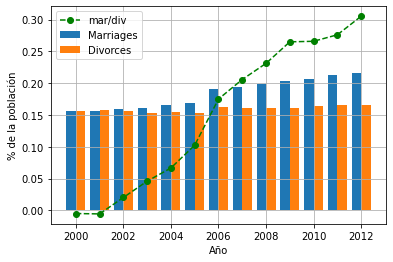

In [8]:
#---------------------------------------
#///////////////PLOTS////////////////
#---------------------------------------
#De las tablas precargadas utilizaremos los datos del rango de edades de 35 a 44 años 
# excepto cuando comparemos la situación laboral, ahí que utilizaremos el rango de 25 a 34 años.

#Los datos representan el índice de matrimonios o divorcios respecto a la población total de esa edad.

#los nombres de las columnas estan escritos como: clave_edades. 
#ej. Para todos de 25 a 34 años: all_2534 




#-------------------------------------------------------------------------------
#1- ¿Cómo es el índice de divorcios contra el de matrimonios?
#-------------------------------------------------------------------------------
what = [cat[0]['all_3544'],cat[1]['all_3544']]
name = ['Marriages','Divorces']
ratio = cat[0]['all_3544']/cat[1]['all_3544']

width=0.8/len(what)
fig, ax = plt.subplots()

for i in range(len(what)):
    ax.bar(cat[0]['year'] - width/2 + width*i, what[i], width ,label=name[i])

plt.plot(cat[0]['year'],ratio-1,'--o',color='green',label='mar/div') #plot ratio


plt.grid()
plt.legend()
plt.xlabel('Año')
plt.ylabel('% de la población')
plt.show()

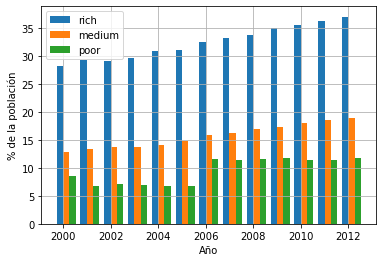

In [9]:
#----------------------------------------------------------
#2- Comparar matrimonios por clase social
#----------------------------------------------------------

what = [cat[0]['poor_3544'],cat[0]['mid_3544'],cat[0]['rich_3544']]
name = ['rich','medium','poor']

barritas(what,name)

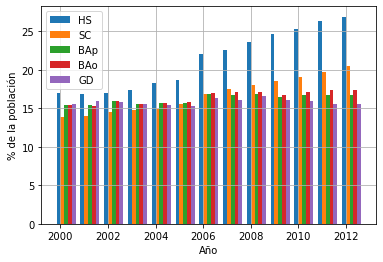

In [10]:
#---------------------------------------------------------------------------------------
#3- Comparar número de matrimonios divorcios con el nivel escolar
#---------------------------------------------------------------------------------------
what = [cat[0]['HS_3544'],cat[0]['SC_3544'], cat[0]['BAp_3544'], cat[0]['BAo_3544'], cat[0]['GD_3544']]
name = ['HS', 'SC', 'BAp', 'BAo', 'GD']

barritas(what,name)

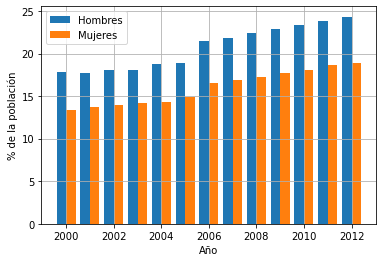

In [11]:
#---------------------------------------------------------------------------------
#4- Comparar el número de matrimonios de hombres contra mujeres
#---------------------------------------------------------------------------------
what = [cat[2]['all_3544'],cat[3]['all_3544']]
name = ['Hombres','Mujeres']

barritas(what,name)

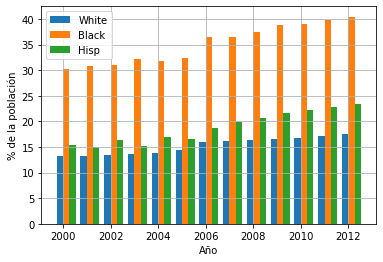

In [12]:
#--------------------------------------------------------------------------------
#5- Comparar los matrimonios por raza
#--------------------------------------------------------------------------------

what = [cat[0]['White_3544'], cat[0]['Black_3544'], cat[0]['Hisp_3544']]
name = ['White', 'Black', 'Hisp']

barritas(what,name)

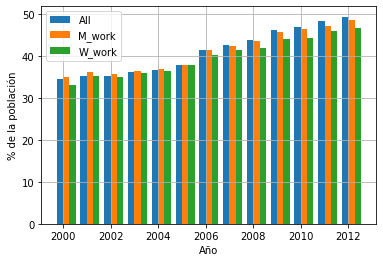

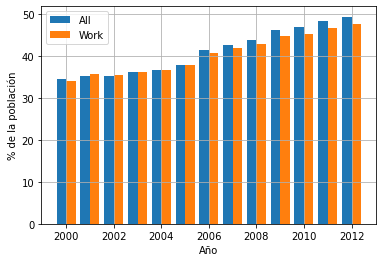

In [13]:
#-------------------------------------------------------------------------------
#6- Comparar matrimonios por situación laboral
#-------------------------------------------------------------------------------
what = [cat[0]['all_2534'], cat[2]['work_2534'], cat[3]['work_2534']]
name = ['All', 'M_work','W_work']

barritas(what,name)


what = [cat[0]['all_2534'], (cat[2]['work_2534']+ cat[3]['work_2534'])/2]
name = ['All', 'Work']

barritas(what,name)

In [14]:
#------------------------------------------------------------------------------
#7-media, mediana y moda de matrimonios/divorcios a lo largo de los años
#-----------------------------------------------------------------------------

print('Casados')
#Promedio
print('Promedio',100*cat[0]['all_3544'].mean())
#Mediana
print('Mediana',100*median(cat[0]['all_3544']))


print('Divorciados')
#Promedio
print('Promedio',100*cat[1]['all_3544'].mean())
#Mediana
print('Mediana',100*median(cat[1]['all_3544']))

Casados
Promedio 18.364837492977625
Mediana 19.0233194660955
Divorciados
Promedio 15.936238344434376
Mediana 16.0468871507897


In [ ]:
#------------------------------------------------------------------------------
#7-media, mediana y moda de matrimonios/divorcios a lo largo de los años
#-----------------------------------------------------------------------------

print('Casados')
#Promedio
print('Promedio',100*cat[0]['all_3544'].mean())
#Mediana
print('Mediana',100*median(cat[0]['all_3544']))


print('Divorciados')
#Promedio
print('Promedio',100*cat[1]['all_3544'].mean())
#Mediana
print('Mediana',100*median(cat[1]['all_3544']))
plt.title('Divorciados')
plt.grid()
plt.legend()
plt.xlabel('Año')
plt.ylabel('% de la población')
plt.show()
#--------------------------------------------------------------------